# Lime Logistic Regression

In [1]:
import pandas as pd #to work with csv files

#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.metrics import accuracy_score

#pre-processing of text
import string
import re

#import classifiers from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#Loading the dataset
our_data = pd.read_csv("Data/Full-Economic-News-DFE-839861.csv", encoding = "ISO-8859-1")
our_data["relevance"].value_counts()/our_data.shape[0] #Class distribution in the dataset
# convert label to a numerical variable
our_data = our_data[our_data.relevance != "not sure"]
our_data['relevance'] = our_data.relevance.map({'yes':1, 'no':0}) #relevant is 1, not-relevant is 0. 
our_data = our_data[["text","relevance"]] #Let us take only the two columns we need.
our_data.shape

#train-test split
X = our_data.text #the column text contains textual data to extract features from
y = our_data.relevance #this is the column we are learning to predict. 
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
#random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Pre-processing and vectorizing
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): #doc is a string of text
    doc = doc.replace("</br>", " ") #This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    #remove punctuation and numbers
    return doc

#Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) #instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)#use it to extract features from training data
#transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
#i.e., the dimension of our feature vector is 49753!

#Train a classifier
vect = CountVectorizer(preprocessor=clean, max_features=1000) #Step-1
X_train_dtm = vect.fit_transform(X_train)#combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LogisticRegression(class_weight='balanced') #instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) #fit the model with training data

#Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

d:\miniconda3\envs\env_pracnlp\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)
(5993, 49753) (1998, 49753)
Accuracy:  0.6836836836836837


d:\miniconda3\envs\env_pracnlp\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [2]:
#Part 2: Using Lime to interpret predictions

from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

y_pred_prob = classifier.predict_proba(X_test_dtm)[:, 1]
c = make_pipeline(vect, classifier)
mystring = list(X_test)[221] #Take a string from test instance
print(f'String input: \n{mystring}\n')
print(c.predict_proba([mystring])) #Prediction is a "No" here. i.e., not relevant
class_names = ["no", "yes"] #not relevant, relevant
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=6)
exp.as_list()

String input: 
NEW YORK, March 19 (AP) ÛÓ The Dow Jones industrial average re treated further from the 1,000 level at the stock market turned in a mixed and erratic showing yesterday.</br></br>The trend of stock prices varied widely from one industry group to another. Oil issues sold off, but savings and loan issues were strong following the recent decline in interest rates.</br></br>Some brokerage-house issues also moved up on word of Prudential InsuranceÛªs plans to acquire Bache Group.</br></br>The Dow Jones average of 30 industrials, which had crossed 1,000 briefly early in the week, dropped 7.48 points to 986.58.</br></br>York; Exxon was down l'/a at 68; Mobil dropped 1% to 64'/t, Superior Oil 2% to 211%, and Cities Service 4% to 42%.

[[0.7905294 0.2094706]]


[('YORK', 0.23092803238232168),
 ('NEW', -0.23043773666311174),
 ('showing', -0.1261844044201892),
 ('AP', -0.08113507594516486),
 ('dropped', 0.07890076630338816),
 ('trend', 0.06753936414006868)]

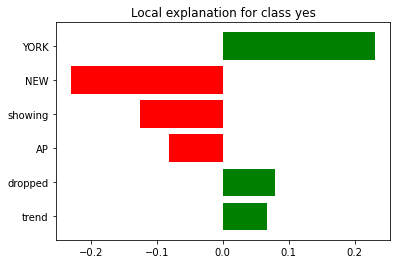

In [3]:
fig = exp.as_pyplot_figure()

In [4]:
exp.show_in_notebook(text=False)

# Lime RNN

In [5]:
# implementation in this Google Colab
# https://colab.research.google.com/drive/1Uo107v2wJLQ6XwoPLnutMNMmPFZFv6r5?usp=sharing

# Shap Logistic Regression

In [6]:
#installing shap
!pip install shap -q

In [7]:
import numpy as np
import pandas as pd #to work with csv files

#matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words

#pre-processing of text
import string
import re

#import classifiers from sklearn
from sklearn.linear_model import LogisticRegression

#import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#import time function from time module to track the training duration
from time import time

In [8]:
our_data = pd.read_csv("https://query.data.world/s/yd24ckbjzyp7h6zp7bacafpv2lgfkh" , encoding = "ISO-8859-1" )

display(our_data.shape) #Number of rows (instances) and columns in the dataset
display(our_data["relevance"].value_counts()/our_data.shape[0])#Class distribution in the dataset



# convert label to a numerical variable
our_data = our_data[our_data.relevance != "not sure"]
our_data.shape
our_data['relevance'] = our_data.relevance.map({'yes':1, 'no':0}) #relevant is 1, not-relevant is 0. 
our_data = our_data[["text","relevance"]] #Let us take only the two columns we need.
our_data.shape



stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): #doc is a string of text
    doc = doc.replace("</br>", " ") #This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    #remove punctuation and numbers
    return doc

(8000, 15)

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

In [9]:
import sklearn

#Step 1: train-test split
X = our_data.text #the column text contains textual data to extract features from
y = our_data.relevance #this is the column we are learning to predict. 
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
#random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

from sklearn.linear_model import LogisticRegression #import

model = LogisticRegression(class_weight="balanced") #instantiate a logistic regression model
model.fit(X_train_dtm, y_train) #fit the model with training data

#Make predictions on test data
y_pred_class = model.predict(X_test_dtm)

#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)
Accuracy:  0.7382382382382382


In [11]:
import shap
explainer = shap.LinearExplainer(model, X_train_dtm, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_dtm)
X_test_array = X_test_dtm.toarray() # we need to pass a dense version for the plotting functions

from pprint import pprint
pprint(our_data['text'][0])

('NEW YORK -- Yields on most certificates of deposit offered by major banks '
 'dropped more than a tenth of a percentage point in the latest week, '
 'reflecting the overall decline in short-term interest rates.</br></br>On '
 'small-denomination, or "consumer," CDs sold directly by banks, the average '
 'yield on six-month deposits fell to 5.49% from 5.62% in the week ended '
 'yesterday, according to an 18-bank survey by Banxquote Money Markets, a '
 'Wilmington, Del., information service.</br></br>On three-month "consumer" '
 'deposits, the average yield sank to 5.29% from 5.42% the week before, '
 'according to Banxquote. Two banks in the Banxquote survey, Citibank in New '
 'York and CoreStates in Pennsylvania, are paying less than 5% on threemonth '
 'small-denomination CDs.</br></br>Declines were somewhat smaller on five-year '
 'consumer CDs, which eased to 7.37% from 7.45%, Banxquote '
 'said.</br></br>Yields on three-month and six-month Treasury bills sold at '
 "Monday's au

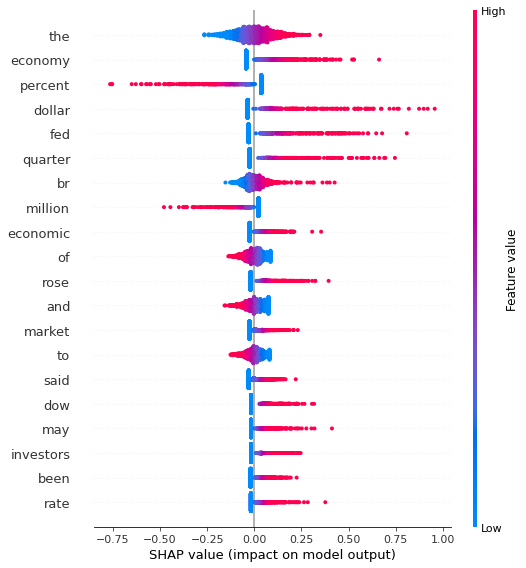

In [12]:
shap.initjs()
shap.summary_plot(shap_values, X_test_array, feature_names=vect.get_feature_names())

This plot is made of all the dots in the train data. It demonstrates the following information:

1. Feature importance: Variables are ranked in descending order from the most important decreasing to the least.
2. Impact: The horizontal location shows what effect the fature has with respect to prediction (higher or lower prediction).
3. Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
4. Correlation: The presence of the word "dollar" has a high (positive) impact in deciding whether the article is relavent to the USA economy.

In [13]:
shap.initjs()

shap.force_plot(
    explainer.expected_value, shap_values[0,:], X_test_array[0,:],
    feature_names=vect.get_feature_names()
)

# Shap RNN

In [14]:
# implementation in this Google Colab
# https://colab.research.google.com/drive/1Uo107v2wJLQ6XwoPLnutMNMmPFZFv6r5?usp=sharing